# Matplotlib Subplots - Alt Grafikler

Birden fazla grafiğin tek bir panel üzerinde görüntülenmesidir. Bunun için bir <code>figure</code> yaratıp akabinde onu <code>subplot</code>'lar ile alt grafiklere böleriz. Genellikle script layer yerine artist layer kullanarak subplot'ları oluştururuz.

Subplot çizdirmek için: <br>
```python
    fig = plt.figure() # figure oluşturur
    ax = fig.add_subplot(nrows, ncols, plot_number) # subplotlar oluşturur.
```

add_subplıt içerisindeki parametrelerin tanımı aşağıdaki gibidir.
* `nrows` ve `ncols` oluşturulan figure'ün kaç kolon ve kaç satırdan oluşacağını söyler. Bu ikisinin çarpımı toplam alt grafik sayısını verir.
* `plot_number`oluşturulan grafiğin figure içerisindeki kaçıncı grafik olduğunu söyler.

Daha sonra <code>df.plot(ax=ax0)</code> plot metodu içerisindeki ax parametresi ile grafiğin hangi bölgede olacağını belirtiyoruz.

Örnekte kullandığımız veri setine ulaşmak için: 

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import pandas as pd
import numpy as np

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Göçmen sayısın toplamını gösteren Total isimli bir kolon ekleyelim
df_can['Total'] = df_can.sum(axis=1)
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")

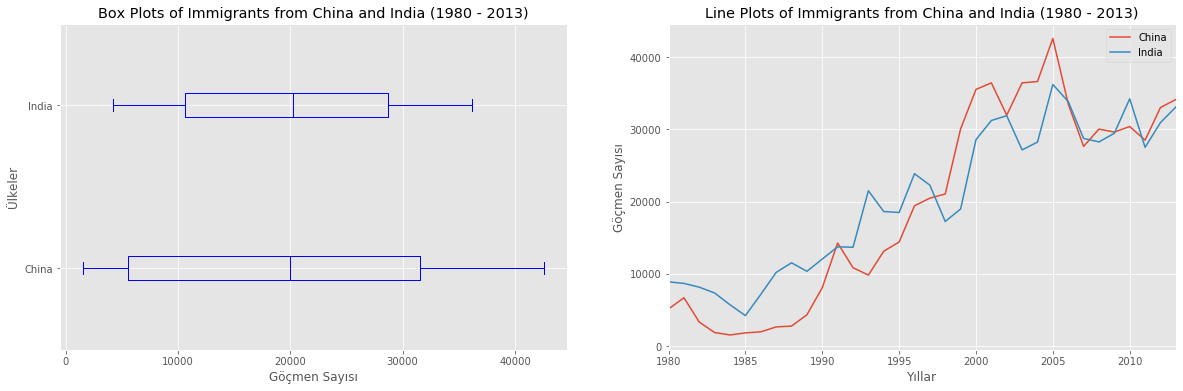

In [4]:
df_CI=df_can.loc[["China","India"],years].transpose() # Verinin hazırlanması

fig = plt.figure() # figürün yaratılması

ax0 = fig.add_subplot(1, 2, 1) # subplot 1 (1 satır, 2 kolon, ilk grafik)
ax1 = fig.add_subplot(1, 2, 2) # subplot 2 (1 satır, 2 kolon, ikinci grafik)

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # subplot 1'in eklenmesi
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Göçmen Sayısı')
ax0.set_ylabel('Ülkeler')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # subplot 2'nin eklenmesi
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Göçmen Sayısı')
ax1.set_xlabel('Yıllar')

plt.show()